In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
url = "https://raw.githubusercontent.com/pirple/Data-Mining-With-Python/master/Part%202/single_family_home_values.csv"
df = pd.read_csv(url, sep = ',')

In [3]:
df.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

## Quy đổi feet vuông sang mét vuông

In [5]:
df['squareMeter'] = df.squareFootage/10.764

In [6]:
df.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,squareMeter
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,128.019324
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963,153.567447
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840,174.842066
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,222.965440
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,214.139725


## Drop cột city và state

In [7]:
df.drop(columns=['city','state'], inplace=True, axis=1)

In [8]:
df.head()

,id,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,squareMeter
0,39525749,8171 E 84th Ave,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,128.019324
1,184578398,10556 Wheeling St,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963,153.567447
2,184430015,3190 Wadsworth Blvd,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840,174.842066
3,155129946,3040 Wadsworth Blvd,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,222.965440
4,245107,5615 S Eaton St,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,214.139725


## Fill missing value cho priorSaleDate, priorSaleAmount, yearBuilt

In [9]:
#Nếu priorSaleDate NaN, fill bằng lastSaleDate
df['priorSaleDate'].fillna(df['lastSaleDate'], inplace = True)

#Nếu priorSaleAmount NaN, fill bằng lastSaleAmount
df['priorSaleAmount'].fillna(df['lastSaleAmount'], inplace = True)

#Nếu priorSaleAmount = 0, fill bằng lastSaleAmount
df.loc[df.priorSaleAmount == 0, 'priorSaleAmount'] = df['lastSaleAmount']

#Fill yearBuilt bằng mean
df['yearBuilt'].fillna(df['yearBuilt'].mean(), inplace = True)

In [10]:
df.head()

,id,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,squareMeter
0,39525749,8171 E 84th Ave,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,128.019324
1,184578398,10556 Wheeling St,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,2004-09-23,216935.0,343963,153.567447
2,184430015,3190 Wadsworth Blvd,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,2008-04-03,330000.0,488840,174.842066
3,155129946,3040 Wadsworth Blvd,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,185000.0,494073,222.965440
4,245107,5615 S Eaton St,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,308000.0,513676,214.139725


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   zipcode          15000 non-null  int64  
 3   latitude         14985 non-null  float64
 4   longitude        14985 non-null  float64
 5   bedrooms         15000 non-null  int64  
 6   bathrooms        15000 non-null  float64
 7   rooms            15000 non-null  int64  
 8   squareFootage    15000 non-null  int64  
 9   lotSize          15000 non-null  int64  
 10  yearBuilt        15000 non-null  float64
 11  lastSaleDate     15000 non-null  object 
 12  lastSaleAmount   15000 non-null  int64  
 13  priorSaleDate    15000 non-null  object 
 14  priorSaleAmount  15000 non-null  float64
 15  estimated_value  15000 non-null  int64  
 16  squareMeter      15000 non-null  float64
dtypes: float64(6

Còn missing value của latitude với longtitude, em chưa biết fill như thế nào ạ

## Tìm và drop duplicate address

In [12]:
#group by và count các giá trị, giá trị nào xuất hiện 2 lần thì có khả năng là duplicate data
display(df['address'].value_counts())

3650 N Adams St        2
3118 N Vine St         2
1166 Harrison St       1
3430 N Humboldt St     1
2371 Clermont St       1
                      ..
3328 N Elizabeth St    1
701 S Jackson St       1
2273 Dexter St         1
2224 N Gilpin St       1
2968 Birch St          1
Name: address, Length: 14998, dtype: int64

In [13]:
#Tìm index của nhà 3650 N Adams St
list(df.address).index('3650 N Adams St')

3274

In [14]:
#Chỗ này em làm manual, mở file excel ra check để tìm index của giá trị thứ 2
display(df.loc[(3274,6145),:])

,id,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,squareMeter
3274,320948074,3650 N Adams St,80205,NaN,NaN,4,4.0,7,2826,4690,2016.0,2017-05-23,735000,2017-05-23,735000.0,745537,262.541806
6145,4277764,3650 N Adams St,80205,NaN,NaN,1,1.0,3,472,9370,1926.0,2015-07-20,250000,2015-07-20,250000.0,745483,43.849870


Tuy trùng address nhưng data khác nhau => 2 nhà khác nhau, không phải duplicate

In [15]:
#Tìm index của nhà 3118 N Vine St
list(df.address).index('3118 N Vine St')

4762

In [16]:
#Chỗ này em làm manual, mở file excel ra check để tìm index của giá trị thứ 2
display(df.loc[(4762,4764),:])

,id,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,squareMeter
4762,248507008,3118 N Vine St,80205,NaN,NaN,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,2013-02-21,425000.0,670436,177.257525
4764,216346608,3118 N Vine St,80205,39.761214,-104.961873,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,2013-02-21,425000.0,671744,177.257525


Có thể thấy 2 hàng này có data gần như trùng nhau hoàn toàn => data bị duplicate

In [17]:
#drop dòng có data bị duplicate
df.drop(4762,axis = 0, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14999 non-null  int64  
 1   address          14999 non-null  object 
 2   zipcode          14999 non-null  int64  
 3   latitude         14985 non-null  float64
 4   longitude        14985 non-null  float64
 5   bedrooms         14999 non-null  int64  
 6   bathrooms        14999 non-null  float64
 7   rooms            14999 non-null  int64  
 8   squareFootage    14999 non-null  int64  
 9   lotSize          14999 non-null  int64  
 10  yearBuilt        14999 non-null  float64
 11  lastSaleDate     14999 non-null  object 
 12  lastSaleAmount   14999 non-null  int64  
 13  priorSaleDate    14999 non-null  object 
 14  priorSaleAmount  14999 non-null  float64
 15  estimated_value  14999 non-null  int64  
 16  squareMeter      14999 non-null  float64
dtypes: float64(6

## Tạo cột mới SaleAgainOrNot

In [19]:
#Nếu priorSaleDate = lastSaleDate hoặc priorSaleAmount = lastSaleAmount, nhà mới bán 1 lần => gán bằng 0
#Còn lại, nhà bán 2 lần trở lên => gán bằng 1

df['SaleAgainOrNot'] = 1
df.loc[df.priorSaleDate == df.lastSaleDate, 'SaleAgainOrNot'] = 0
df.loc[df.priorSaleAmount == df.lastSaleAmount, 'SaleAgainOrNot'] = 0

In [20]:
df.head(10)

,id,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,squareMeter,SaleAgainOrNot
0,39525749,8171 E 84th Ave,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,128.019324,1
1,184578398,10556 Wheeling St,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,2004-09-23,216935.0,343963,153.567447,0
2,184430015,3190 Wadsworth Blvd,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,2008-04-03,330000.0,488840,174.842066,0
3,155129946,3040 Wadsworth Blvd,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,185000.0,494073,222.965440,0
4,245107,5615 S Eaton St,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,308000.0,513676,214.139725,0
5,3523925,6535 W Sumac Ave,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,190.542549,1
6,30560679,6673 W Berry Ave,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953,190.542549,1
7,39623928,5640 S Otis St,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321,190.542549,1
8,148975825,5342 S Gray St,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,274900.0,496079,166.852471,0
9,184623176,4967 S Wadsworth Blvd,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514,190.821256,1


## Analysis

In [21]:
df.lastSaleDate = pd.to_datetime(df.lastSaleDate)
df['lastSaleYear'] = df.lastSaleDate.dt.year

In [22]:
df.priorSaleDate = pd.to_datetime(df.priorSaleDate)
df['priorSaleYear'] = df.priorSaleDate.dt.year

In [23]:
df.head()

,id,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,squareMeter,SaleAgainOrNot,lastSaleYear,priorSaleYear
0,39525749,8171 E 84th Ave,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,128.019324,1,2009,2004
1,184578398,10556 Wheeling St,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,2004-09-23,216935.0,343963,153.567447,0,2004,2004
2,184430015,3190 Wadsworth Blvd,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,2008-04-03,330000.0,488840,174.842066,0,2008,2008
3,155129946,3040 Wadsworth Blvd,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,185000.0,494073,222.965440,0,2008,2008
4,245107,5615 S Eaton St,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,308000.0,513676,214.139725,0,2012,2011


Text(0, 0.5, 'Number of sale house')

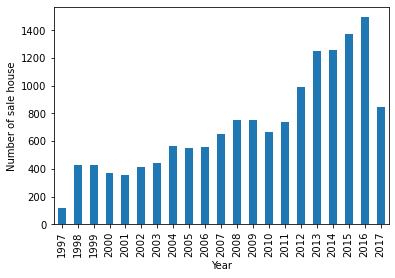

In [24]:
df['lastSaleYear'].value_counts().sort_index().plot.bar()

plt.xlabel('Year')
plt.ylabel('Number of sale house') 

Xu hướng bán bất động sản phát triển nhanh theo thời gian.
Lưu ý, dữ liệu chỉ được thu thập đến tháng 7.2017, do đó data ghi nhận ở đây là số lượng nhà được bán vào năm 2017 chỉ bằng khoản 1/2 so với năm 2016.

([<matplotlib.patches.Wedge at 0x280a003bee0>,
 [Text(-0.4622276088435649, 0.9981711464587426, 'Only 1 time'),
  Text(0.4622275153880349, -0.9981711897356105, 'Sale again')],
 [Text(-0.2521241502783081, 0.544456988977496, '63.8%'),
  Text(0.25212409930256446, -0.5444570125830602, '36.2%')])

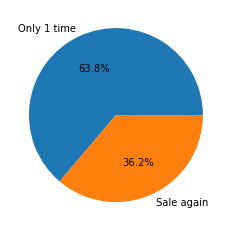

In [25]:
plt.pie(df['SaleAgainOrNot'].value_counts(), labels = ['Only 1 time','Sale again'],autopct='%1.1f%%')

Tại thị trường BĐS ở Denver (1997-2017), có khoảng 36% số lượng nhà được mua đi bán lại, số còn lại chỉ được bán 1 lần và không đổi chủ.

In [26]:
df['lastSaleAmount_m2'] = df.lastSaleAmount / df.squareMeter
df['priorSaleAmount_m2'] = df.priorSaleAmount / df.squareMeter

df['GapPrice'] = (df.lastSaleAmount_m2 - df.priorSaleAmount_m2)

In [27]:
df.head(10)

,id,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,...,priorSaleDate,priorSaleAmount,estimated_value,squareMeter,SaleAgainOrNot,lastSaleYear,priorSaleYear,lastSaleAmount_m2,priorSaleAmount_m2,GapPrice
0,39525749,8171 E 84th Ave,80022,39.849160,-104.893468,3,2.0,6,1378,9968,...,2004-05-13,165700.0,239753,128.019324,1,2009,2004,585.849057,1294.335849,-708.486792
1,184578398,10556 Wheeling St,80022,39.888020,-104.830930,2,2.0,6,1653,6970,...,2004-09-23,216935.0,343963,153.567447,0,2004,2004,1412.636624,1412.636624,0.000000
2,184430015,3190 Wadsworth Blvd,80033,39.761710,-105.081070,3,1.0,0,1882,23875,...,2008-04-03,330000.0,488840,174.842066,0,2008,2008,1887.417641,1887.417641,0.000000
3,155129946,3040 Wadsworth Blvd,80033,39.760780,-105.081060,4,3.0,0,2400,11500,...,2008-06-27,185000.0,494073,222.965440,0,2008,2008,829.725000,829.725000,0.000000
4,245107,5615 S Eaton St,80123,39.616181,-105.058812,3,4.0,8,2305,5600,...,2011-12-29,308000.0,513676,214.139725,0,2012,2011,1438.313232,1438.313232,0.000000
5,3523925,6535 W Sumac Ave,80123,39.615136,-105.069018,3,5.0,7,2051,6045,...,2005-05-16,339000.0,496062,190.542549,1,2006,2005,1907.710385,1779.130180,128.580205
6,30560679,6673 W Berry Ave,80123,39.616350,-105.070760,4,4.0,8,2051,6315,...,2006-07-07,345000.0,514953,190.542549,1,2014,2006,2204.232082,1810.619210,393.612872
7,39623928,5640 S Otis St,80123,39.615213,-105.070617,3,3.0,7,2051,8133,...,1998-04-09,225200.0,494321,190.542549,1,2004,1998,1725.074013,1181.888250,543.185763
8,148975825,5342 S Gray St,80123,39.620158,-105.063094,3,3.0,7,1796,5038,...,2011-01-10,274900.0,496079,166.852471,0,2011,2011,1647.563252,1647.563252,0.000000
9,184623176,4967 S Wadsworth Blvd,80123,39.626770,-105.081990,3,3.0,0,2054,4050,...,2012-10-30,312000.0,424514,190.821256,1,2015,2012,2132.886076,1635.037975,497.848101


,lastSaleYear,GapPrice
0,1997-01-01,0.000000
1,1998-01-01,30.120930
2,1999-01-01,47.121690
3,2000-01-01,145.207634
4,2001-01-01,125.461509
5,2002-01-01,153.592169
6,2003-01-01,166.814649
7,2004-01-01,249.519679
8,2005-01-01,191.118920
9,2006-01-01,367.733429


Text(-2.700000000000003, 0.5, 'GapPrice (USD/m2)')

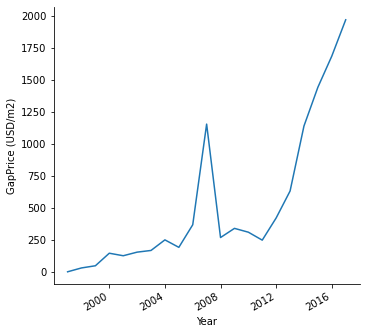

In [44]:
df_line = df.groupby('lastSaleYear')['GapPrice'].mean().to_frame().reset_index()
display(df_line)

#plt.plot(df_line['lastSaleYear'], df_line['GapPrice'])

df['lastSaleYear'] = pd.to_datetime(df['lastSaleYear'], format='%Y')
l = sns.relplot(x = df_line['lastSaleYear'], y = df_line['GapPrice'], data = df_line, kind = 'line')
l.fig.autofmt_xdate()

plt.xlabel('Year')
plt.ylabel('GapPrice (USD/m2)') 

Từ năm 1997-2006, giá BĐS ở Denver tăng chậm dần đều.
Vào năm 2007, giá BĐS ở Denver đột nhiên tăng đột biến.
Từ năm 2010-2017, giá tăng nhanh dần đều.

,zipcode,GapPrice
0,80022,-354.243396
1,80033,0.000000
2,80123,174.411485
3,80202,174.453992
4,80203,674.424663
5,80204,769.664738
6,80205,736.761362
7,80206,804.603243
8,80207,697.776513
9,80209,802.063981


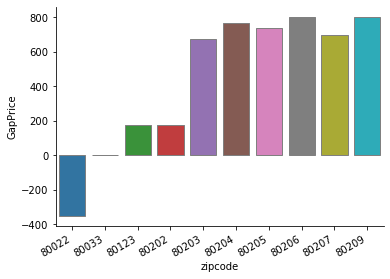

In [29]:
df_bar = df.groupby('zipcode')['GapPrice'].mean().to_frame().reset_index()
display(df_bar)
 
#plt.bar(df_bar['zipcode'],df_bar['GapPrice'])
b = sns.catplot(x = df_bar['zipcode'], y = df_bar['GapPrice'], kind = 'bar', data = df_bar, edgecolor=".5", height=4, aspect=4/3)
b.fig.autofmt_xdate()

Khu vực có zipcode 80022 và 80033 có giá nhà giảm hoặc không tăng.
Khu vực có zipcode 80123 và 80202 có giá nhà tăng nhưng không nhiều.
Tất cả các khu vực còn lại đều tăng gần như nhau, riêng hai khu vực 80206 và 80209 có giá tăng nhiều nhất trong số các khu vực tại Denver.

In [30]:
#phân nhóm giá thấp, giá cao (bin) qcut cut của pd
#dummies (bài FB ads) -> corr -> xem biến nào có corr cao

In [31]:
df['EstimatedValue_m2'] = df.estimated_value / df.squareMeter
df.head()

,id,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,...,priorSaleAmount,estimated_value,squareMeter,SaleAgainOrNot,lastSaleYear,priorSaleYear,lastSaleAmount_m2,priorSaleAmount_m2,GapPrice,EstimatedValue_m2
0,39525749,8171 E 84th Ave,80022,39.849160,-104.893468,3,2.0,6,1378,9968,...,165700.0,239753,128.019324,1,2009-01-01,2004,585.849057,1294.335849,-708.486792,1872.787585
1,184578398,10556 Wheeling St,80022,39.888020,-104.830930,2,2.0,6,1653,6970,...,216935.0,343963,153.567447,0,2004-01-01,2004,1412.636624,1412.636624,0.000000,2239.817140
2,184430015,3190 Wadsworth Blvd,80033,39.761710,-105.081070,3,1.0,0,1882,23875,...,330000.0,488840,174.842066,0,2008-01-01,2008,1887.417641,1887.417641,0.000000,2795.894665
3,155129946,3040 Wadsworth Blvd,80033,39.760780,-105.081060,4,3.0,0,2400,11500,...,185000.0,494073,222.965440,0,2008-01-01,2008,829.725000,829.725000,0.000000,2215.917405
4,245107,5615 S Eaton St,80123,39.616181,-105.058812,3,4.0,8,2305,5600,...,308000.0,513676,214.139725,0,2012-01-01,2011,1438.313232,1438.313232,0.000000,2398.788921


In [32]:
df['EstimatedValue_m2'].describe()

count    14999.000000
mean      4541.354844
std       1315.532635
min        929.194932
25%       3656.474860
50%       4377.984000
75%       5219.430127
max      33555.563595
Name: EstimatedValue_m2, dtype: float64

In [33]:
bins = [0,4541.354844,33555.563595]
labels = ['Cheap','Expensive']

In [34]:
#Tạo cột EstimatedValue_m2_Cat: giá < mean là cheap, giá > mean là expensive
df['EstimatedValue_m2_Cat'] = pd.cut(df['EstimatedValue_m2'],bins,labels = labels)

In [35]:
df.head(50)

,id,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,...,estimated_value,squareMeter,SaleAgainOrNot,lastSaleYear,priorSaleYear,lastSaleAmount_m2,priorSaleAmount_m2,GapPrice,EstimatedValue_m2,EstimatedValue_m2_Cat
0,39525749,8171 E 84th Ave,80022,39.849160,-104.893468,3,2.0,6,1378,9968,...,239753,128.019324,1,2009-01-01,2004,585.849057,1294.335849,-708.486792,1872.787585,Cheap
1,184578398,10556 Wheeling St,80022,39.888020,-104.830930,2,2.0,6,1653,6970,...,343963,153.567447,0,2004-01-01,2004,1412.636624,1412.636624,0.000000,2239.817140,Cheap
2,184430015,3190 Wadsworth Blvd,80033,39.761710,-105.081070,3,1.0,0,1882,23875,...,488840,174.842066,0,2008-01-01,2008,1887.417641,1887.417641,0.000000,2795.894665,Cheap
3,155129946,3040 Wadsworth Blvd,80033,39.760780,-105.081060,4,3.0,0,2400,11500,...,494073,222.965440,0,2008-01-01,2008,829.725000,829.725000,0.000000,2215.917405,Cheap
4,245107,5615 S Eaton St,80123,39.616181,-105.058812,3,4.0,8,2305,5600,...,513676,214.139725,0,2012-01-01,2011,1438.313232,1438.313232,0.000000,2398.788921,Cheap
5,3523925,6535 W Sumac Ave,80123,39.615136,-105.069018,3,5.0,7,2051,6045,...,496062,190.542549,1,2006-01-01,2005,1907.710385,1779.130180,128.580205,2603.418512,Cheap
6,30560679,6673 W Berry Ave,80123,39.616350,-105.070760,4,4.0,8,2051,6315,...,514953,190.542549,1,2014-01-01,2006,2204.232082,1810.619210,393.612872,2702.561722,Cheap
7,39623928,5640 S Otis St,80123,39.615213,-105.070617,3,3.0,7,2051,8133,...,494321,190.542549,1,2004-01-01,1998,1725.074013,1181.888250,543.185763,2594.281445,Cheap
8,148975825,5342 S Gray St,80123,39.620158,-105.063094,3,3.0,7,1796,5038,...,496079,166.852471,0,2011-01-01,2011,1647.563252,1647.563252,0.000000,2973.159441,Cheap
9,184623176,4967 S Wadsworth Blvd,80123,39.626770,-105.081990,3,3.0,0,2054,4050,...,424514,190.821256,1,2015-01-01,2012,2132.886076,1635.037975,497.848101,2224.668304,Cheap


In [36]:
#Tách EstimatedValue_m2_Cat thành 2 cột Cheap và Expensive
df_dummies = pd.get_dummies(df, columns = ['EstimatedValue_m2_Cat'])

In [37]:
df_dummies.head()

,id,address,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,...,squareMeter,SaleAgainOrNot,lastSaleYear,priorSaleYear,lastSaleAmount_m2,priorSaleAmount_m2,GapPrice,EstimatedValue_m2,EstimatedValue_m2_Cat_Cheap,EstimatedValue_m2_Cat_Expensive
0,39525749,8171 E 84th Ave,80022,39.849160,-104.893468,3,2.0,6,1378,9968,...,128.019324,1,2009-01-01,2004,585.849057,1294.335849,-708.486792,1872.787585,1,0
1,184578398,10556 Wheeling St,80022,39.888020,-104.830930,2,2.0,6,1653,6970,...,153.567447,0,2004-01-01,2004,1412.636624,1412.636624,0.000000,2239.817140,1,0
2,184430015,3190 Wadsworth Blvd,80033,39.761710,-105.081070,3,1.0,0,1882,23875,...,174.842066,0,2008-01-01,2008,1887.417641,1887.417641,0.000000,2795.894665,1,0
3,155129946,3040 Wadsworth Blvd,80033,39.760780,-105.081060,4,3.0,0,2400,11500,...,222.965440,0,2008-01-01,2008,829.725000,829.725000,0.000000,2215.917405,1,0
4,245107,5615 S Eaton St,80123,39.616181,-105.058812,3,4.0,8,2305,5600,...,214.139725,0,2012-01-01,2011,1438.313232,1438.313232,0.000000,2398.788921,1,0


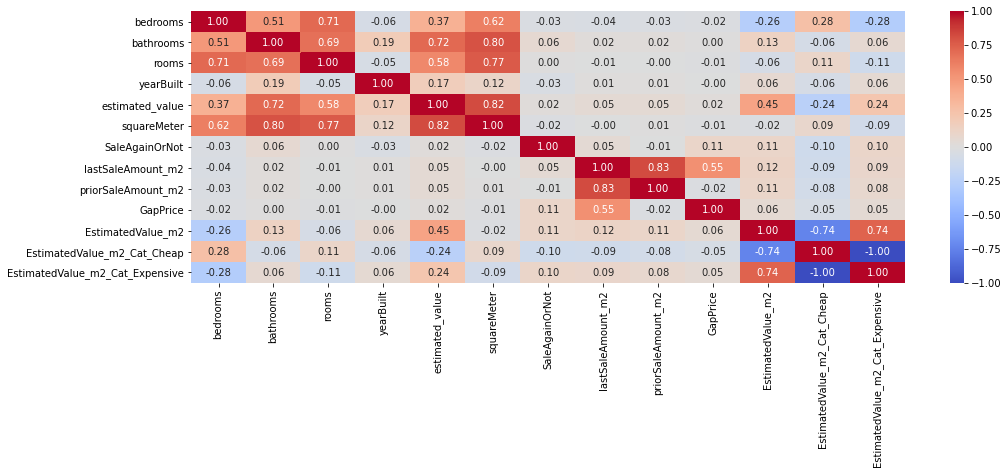

In [38]:
plt.figure(figsize=(16,5))
x = sns.heatmap(df_dummies[df_dummies.columns.difference(['id','address','squareFootage','lastSaleAmount',
                                                          'priorSaleAmount','priorSaleYear','latitude','longitude',
                                                          'zipcode','lotSize'], sort=False)].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

Estimated_value có liên hệ tích cực với zipcode, bedrooms, bathrooms, rooms, lotSize, yearBuilt và squareMeter. Trong đó, bathrooms và squareMeter có ảnh hưởng lớn nhất đến giá nhà, như vậy, nhà rộng và có nhiều phòng tắm được ưa chuộng và bán được giấ cao hơn. EstimatedValue_m2_Cat_Expensive tỉ lệ thuận với bathroom, yearBuilt và SaleAgainOrNot, một lần nữa ta thấy rằng nhà có nhiều phòng tắm, mới xây và dược mua đi bán lại thường có giá cao.

In [39]:
#Do bathrooms có nhiều data deciaml (ko hợp lý), nên em làm tròn lên data của bathrooms
df['bathrooms'] = df['bathrooms'].apply(np.ceil)

In [40]:
display(df.loc[(665),:])

id                                   9593671
address                       709 Raleigh St
zipcode                                80204
latitude                           39.728697
longitude                        -105.041953
bedrooms                                   2
bathrooms                                1.0
rooms                                      4
squareFootage                            522
lotSize                                 6270
yearBuilt                             1921.0
lastSaleDate             2006-09-07 00:00:00
lastSaleAmount                         66000
priorSaleDate            2005-03-21 00:00:00
priorSaleAmount                      65000.0
estimated_value                       257073
squareMeter                        48.494983
SaleAgainOrNot                             1
lastSaleYear             2006-01-01 00:00:00
priorSaleYear                           2005
lastSaleAmount_m2                1360.965517
priorSaleAmount_m2               1340.344828
GapPrice  

,bathrooms,EstimatedValue_m2
0,0.0,5029.969826
1,1.0,4418.086581
2,2.0,4590.107069
3,3.0,4283.580811
4,4.0,4580.442954
5,5.0,5246.722336
6,6.0,6043.321361
7,7.0,7000.135347
8,8.0,6622.799341
9,9.0,7463.825407


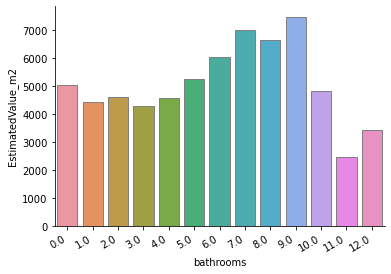

In [43]:
df_bar1 = df.groupby('bathrooms')['EstimatedValue_m2'].mean().to_frame().reset_index()
display(df_bar1)

b1 = sns.catplot(x = df_bar1['bathrooms'], y = df_bar1['EstimatedValue_m2'], kind = 'bar', data = df_bar, edgecolor=".5", height=4, aspect=4/3)
b1.fig.autofmt_xdate()